# Lab 2 (Project #2) Linear and Multivariable Regression - Python SKlearn

In [10]:
# Step 1: Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split # For data splitting 
from sklearn.linear_model import LinearRegression # For modelling of the splitted dataset 
from sklearn.metrics import mean_squared_error, r2_score  # For model accuracy preformance analysis

# Practice #1 with Synthetic Data (Linear Equation, with known slope (2) and Intercept (3)
# Here you will generate Clean data (alfa =0) and Noisy data by introducing a random noise (alfa non-zero)
def linear(x):
    return 3+ 2*x + alfa*np.random.random(len(x))

alfa = 0.0
x= np.linspace(0,10,100)
df= pd.DataFrame({'x':x, 'y':linear(x)})
df.to_excel('synthetic.xlsx', index =False)
#df.info()

# SKlearn based Regression

[2.] 3.0
Mean Squared Error: 5.679798517591285e-30
Root Mean Squared Error: 2.383232787117382e-15
R-Square: 1.0


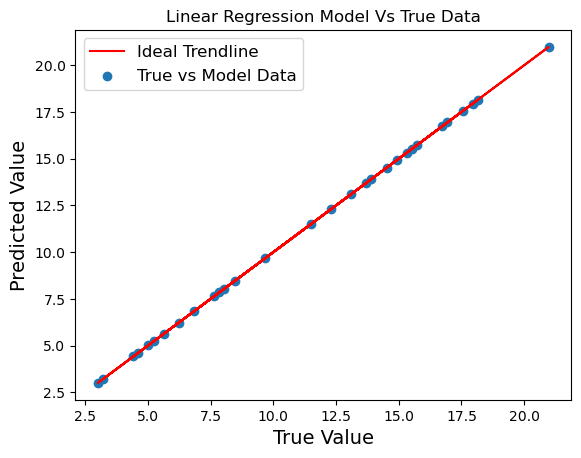

In [4]:
# Step 2: Import/Reading the dataset of synthetic and pre-processed drilling data with file name synthetic.xlsx: 
df=pd.read_excel('synthetic.xlsx')

# Step 3: Define Input (Feature) and Output(Target) Variable   
#By convention, we used the Capital letter X for input features and the small letter y, for the target variable
#Step 3a: Featuure and Target variables selection for Linear regression
X = df[['x']] # Here use double parenthesis
y = df['y']  # Here use singe parenthesis
      
#Step 3b: Featuure and Target variables selection for Multivariable regression
#X= df[['x3','x4']]  # Here use double parenthesis
#y = df['y']

# Another method of selecting features for Multivaraibale regression. select all features excep the last
#X = df.iloc[:,0:-1].values  # Except the last column, i.e y
#y = df.iloc[:,-1].values # Only the last column , i.e y


#Step 3c: Split the data for training (70%) and testing (30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)


#Step 4 Machine learning modeling and prediction
#We use a class called lineraRegression model to perform training.
# Class LinearRegression as a function called .fit() used to generate the optimized coefficients
regressor = LinearRegression()  
regressor.fit(X_train, y_train) #Fit function

# Step 5 Prediction
# Class LinearRegression as a function called .predict() used to perform model prediction by using the optimized coefficients
y_pred = regressor.predict(X_test)

# If we want to see the optimized coefficients, we will use print(use....coef_,  regressor.intercept_ )
print (regressor.coef_,regressor.intercept_)

# Step 6 Model Performance Accuracy Evaluations
# Function to calculate the R^2 based on the predicted and true dataset:
mse = mean_squared_error(y_test, y_pred)  # Mean square sum error between the prediction and the true value
rmse = np.sqrt(mean_squared_error(y_test, y_pred)) # Root means square error between the prediction and the true value
r2 = r2_score(y_test, y_pred)  # Regression coefficient 

print('Mean Squared Error:', mse)
print('Root Mean Squared Error:',rmse)
print('R-Square:',r2 )

# Step 7 Plotting
# Scatter plot (Predicted vs True) and Ideal Trendline
plt.plot(y_test,y_test, '-r')
plt.scatter(y_test, y_pred)

plt.title('Linear Regression Model Vs True Data')
plt.xlabel('True Value',fontsize=14)
plt.ylabel('Predicted Value',fontsize=14)
plt.legend(['Ideal Trendline', 'True vs Model Data'], loc='upper left', fontsize=12)
plt.show()

# Homework: Do your project #2 using the Project #1 Cleaned Data
    Using your cleaned project file (Project#1), use the code to generate models
    a) Linear regression.....Vp as a function of DEN, NEU and Vs
    b) Multivariable regression...Vp as a function of the combination of Vs, DEN and NEU